In [523]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [524]:
train = pd.read_csv('train_c.csv')
test = pd.read_csv('test_c.csv')

# Count How Many Missing Values in Train and Test Set

In [525]:
train_na = pd.DataFrame({'Sum of NA':train.isnull().sum()}).sort(['Sum of NA'],ascending=[0])
train_na['Percentage'] = train_na['Sum of NA']/train.shape[1]
train_na = train_na[train_na['Percentage']>0]
test_na = pd.DataFrame({'Sum of NA':test.isnull().sum()}).sort(['Sum of NA'],ascending=[0])
test_na['Percentage'] = test_na['Sum of NA']/test.shape[1]
test_na = test_na[test_na['Percentage']>0]

In [526]:
print(train_na.shape)
print(test_na.shape)

(51, 2)
(47, 2)


In [527]:
train_na

,Sum of NA,Percentage
hospital_beds_raion,14441,49.455479
build_year,13605,46.592466
state,13559,46.434932
cafe_avg_price_500,13281,45.482877
cafe_sum_500_max_price_avg,13281,45.482877
cafe_sum_500_min_price_avg,13281,45.482877
max_floor,9572,32.780822
material,9572,32.780822
num_room,9572,32.780822
kitch_sq,9572,32.780822


# Involve Apartment Data to help on Missing Value Handling

In [528]:
train['km_sign'] = train['metro_km_avto'].apply(lambda x: str(round(x,2)))
test['km_sign']=test['metro_km_avto'].apply(lambda x: str(round(x,2)))

In [529]:
train['apartment_name']= train.apply(lambda x:str(x['sub_area'])+x['km_sign'],axis=1)
test['apartment_name'] = test.apply(lambda x:str(x['sub_area'])+x['km_sign'],axis=1)

In [530]:
del train['km_sign']
del test['km_sign']

In [531]:
print('Unique apartment: '+str(len(list(set(train['apartment_name'])))))

Unique apartment: 9438


In [532]:
Feature_Importance = pd.read_csv('FScore_xgb.csv')

In [533]:
Feature_Importance.iloc[0:20,:]

,Feature,Score
0,full_sq,1185
1,life_sq,473
2,floor,359
3,build_year,291
4,max_floor,275
5,kitch_sq,163
6,num_room,129
7,state,119
8,kindergarten_km,102
9,railroad_km,101


# Handling Missing Values on some columns

## 1: Life-sq

**Hypothesis: Apartment in the same building may have similar ratio of life space.**

In [534]:
LS_non_NA = train[train['life_sq'].notnull()]
LS_non_NA_apartment = LS_non_NA[LS_non_NA['floor'].notnull()]
LS_non_NA_apartment = LS_non_NA_apartment[LS_non_NA_apartment['full_sq']<1000]
LS_non_NA_apartment = LS_non_NA_apartment[LS_non_NA_apartment['life_sq']<1000]
LS_non_NA_apartment = LS_non_NA_apartment[LS_non_NA_apartment['full_sq']>5]
LS_non_NA_apartment = LS_non_NA_apartment[LS_non_NA_apartment['life_sq']>0]
LS_non_NA_apartment = LS_non_NA_apartment.query('full_sq>=life_sq')
LS_non_NA_house = LS_non_NA[LS_non_NA['floor'].isnull()]
print(LS_non_NA_apartment.shape)
print(LS_non_NA_house.shape)

(23846, 293)
(140, 293)


In [535]:
## Same thing for test data
LS_non_NA_test = test[test['life_sq'].notnull()]
LS_non_NA_apartment_test = LS_non_NA_test[LS_non_NA_test['floor'].notnull()]
LS_non_NA_apartment_test = LS_non_NA_apartment_test[LS_non_NA_apartment_test['full_sq']<1000]
LS_non_NA_apartment_test = LS_non_NA_apartment_test[LS_non_NA_apartment_test['life_sq']<1000]
LS_non_NA_apartment_test = LS_non_NA_apartment_test[LS_non_NA_apartment_test['full_sq']>5]
LS_non_NA_apartment_test = LS_non_NA_apartment_test[LS_non_NA_apartment_test['full_sq']>0]
LS_non_NA_apartment_test = LS_non_NA_apartment_test.query('full_sq>=life_sq')
LS_non_NA_house_test = LS_non_NA_test[LS_non_NA_test['floor'].isnull()]

In [536]:
LS_non_NA_apartment = pd.concat([LS_non_NA_apartment,LS_non_NA_apartment_test])
LS_non_NA_house = pd.concat([LS_non_NA_house,LS_non_NA_house_test])

In [537]:
## Group By Apartment 
train_by_apartment = LS_non_NA_apartment[['full_sq','life_sq','apartment_name']]
train_by_apartment['ratio'] = train_by_apartment['life_sq']/train_by_apartment['full_sq']
## For Avoiding Annoying Data
train_by_apartment = train_by_apartment[train_by_apartment['ratio']<1]

In [538]:
ratio_by_apartment = train_by_apartment.groupby('apartment_name')['ratio'].mean().to_frame()

In [539]:
ratio_by_apartment = pd.DataFrame({'apartment_name':ratio_by_apartment.index,'ratio':ratio_by_apartment['ratio']}).reset_index(drop=True)

In [540]:
## Do not let weird ratio influence the data cleansing
ratio_by_apartment = ratio_by_apartment[ratio_by_apartment['ratio']>0.1]

In [541]:
train = train.merge(ratio_by_apartment,how='left',on='apartment_name')
test = test.merge(ratio_by_apartment,how='left',on='apartment_name')
train['life_sq'] = train['life_sq'].fillna(-1)
test['life_sq'] = test['life_sq'].fillna(-1)

In [542]:
train['ratio'] = train['ratio'].fillna(-1)

In [543]:
## First deal with the properties that have a recognized ratio
for i in range(len(train)):
    if train.iloc[i,3]<0 and train['ratio'][i]>0:
        ratio = train['ratio'][i]
        train.iloc[i,3] = train.iloc[i,2]*ratio

In [544]:
## Same thing for test set
for i in range(len(test)):
    if test.iloc[i,3]<0 and test['ratio'][i]>0:
        ratio = test['ratio'][i]
        test.iloc[i,3] = test.iloc[i,2]*ratio

**For the other properties that cannot find a corresponding apartment, we fill the ratio with the 'closest apartment', and get the life sq for them**

In [545]:
train['apartment_name'] = pd.to_numeric(train['apartment_name'])
test['apartment_name'] = pd.to_numeric(test['apartment_name'])

In [546]:
train = train.sort_values(by ='apartment_name',ascending = 1).reset_index(drop=True)
test = test.sort_values(by = 'apartment_name',ascending =1).reset_index(drop=True)

In [547]:
unique_apartment_train = list(set(train[train['life_sq']<0]['apartment_name']))
unique_apartment_test = list(set(test[test['life_sq']<0]['apartment_name']))

In [548]:
apartment_list = list(ratio_by_apartment['apartment_name'])
apartment_list = [float(each) for each in apartment_list]

In [549]:
def find_closest(list1,list2):
    ratio = []
    closest = []
    gap = []
    for each in list1:
        gap_list = [np.abs(ii - each) for ii in list2]
        min_gap = min(gap_list)
        index = gap_list.index(min_gap)
        #print(index)
        ratio.append(list(ratio_by_apartment['ratio'])[index])
        closest.append(list2[index])
        gap.append(min_gap)
    return ratio,closest,gap

In [550]:
train_close_traio,train_closest_apartment,gap_train = find_closest(unique_apartment_train,apartment_list)

In [551]:
test_close_traio,test_closest_apartment,gap_test = find_closest(unique_apartment_test,apartment_list)

In [552]:
train_still_missing = pd.DataFrame({'apartment_name':unique_apartment_train,'ratio_close':train_close_traio,'gap':gap_train})

In [553]:
test_still_missing = pd.DataFrame({'apartment_name':unique_apartment_test,'ratio_close':test_close_traio,'gap':gap_test})

In [555]:
del train_still_missing['gap']
del test_still_missing['gap']

In [556]:
train = train.merge(train_still_missing,how='left',on='apartment_name')
test = test.merge(test_still_missing,how='left',on='apartment_name')

In [558]:
for i in range(len(train)):
    if train.iloc[i,3]<0:
        train.iloc[i,3] = train['full_sq'][i]*train['ratio_close'][i]

In [559]:
for i in range(len(test)):
    if test.iloc[i,3]<0:
        test.iloc[i,3] = test['full_sq'][i]*test['ratio_close'][i]

In [560]:
del train['ratio']
del train['ratio_close']
del test['ratio']
del test['ratio_close']

In [561]:
tmp = train[train['full_sq']>0]
tmp['ratio_valid'] = tmp['life_sq']/tmp['full_sq']
tmp = tmp[tmp['ratio_valid']<1]

In [562]:
from ggplot import *

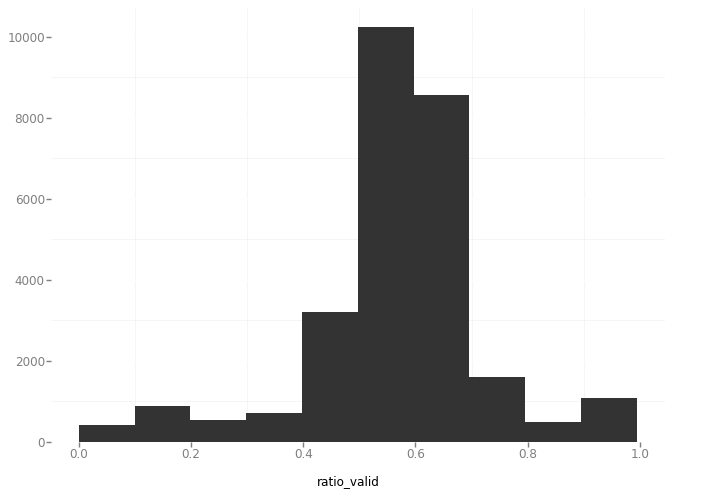

<ggplot: (-9223363253577184694)>


In [563]:
g = ggplot(tmp,aes(x='ratio_valid')) + geom_histogram() +theme_bw()
print(g)

## 2: Build Year

**Hythesis: Same building got the same build year. And, if the building are surrounded by mostly build in a certain period, then we can fill it in.**

In [564]:
BY_good_train = train[train['build_year'].notnull()]
BY_good_train = BY_good_train[BY_good_train['build_year']<2020]
BY_good_train = BY_good_train[BY_good_train['build_year']>1000]
BY_good_test = test[test['build_year'].notnull()]
BY_good_test = BY_good_test[BY_good_test['build_year']<2020]
BY_good_test= BY_good_test[BY_good_test['build_year']>1000]

In [565]:
BY_good = pd.concat([BY_good_train,BY_good_test])

See whether an apartment has only one build-year in this case.

In [566]:
Test_BY = BY_good.groupby(['apartment_name','build_year'])['build_year'].size().to_frame()

In [567]:
Test_BY.columns = ['Count']

In [568]:
Test_BY = Test_BY.reset_index(level=['apartment_name', 'build_year'])

We calculate the average value of build year for each apartment and calculate the gap. If the gap is not huge then we just use the average as the value for filling NA.

In [569]:
Average_BY = Test_BY.groupby('apartment_name')['build_year'].mean().to_frame().reset_index(level='apartment_name')

In [570]:
Average_BY.columns=['apartment_name','Average_Yr']

In [571]:
Test_BY = Test_BY.merge(Average_BY,how='left',on='apartment_name')

In [572]:
Test_BY['Gap'] = np.abs(Test_BY['Average_Yr'] - Test_BY['build_year'])

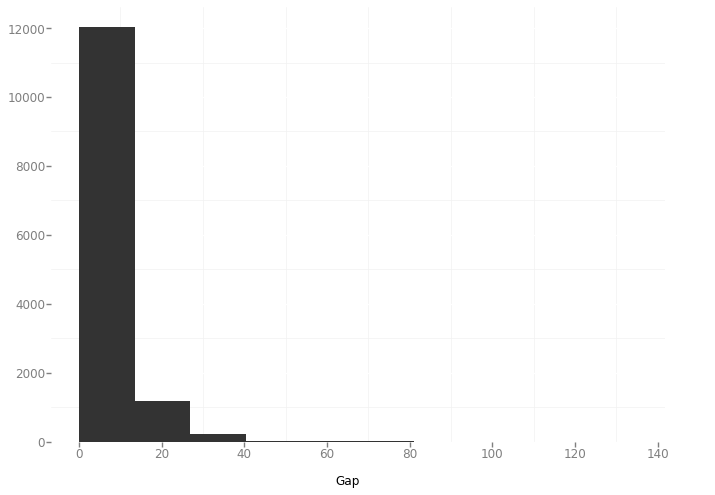

<ggplot: (-9223363253611952426)>


In [573]:
g = ggplot(Test_BY,aes(x='Gap')) + geom_histogram() + theme_bw()
print(g)

**Only keep the apartment with reasonable gap**

In [574]:
Test_BY = Test_BY[Test_BY['Gap']<=3]

In [575]:
Test_BY = Test_BY[['apartment_name','Average_Yr']]

In [576]:
Test_BY.shape

(9752, 2)

In [577]:
Test_BY = Test_BY.drop_duplicates()

In [578]:
train = train.merge(Test_BY,how='left',on='apartment_name')
test = test.merge(Test_BY,how = 'left',on='apartment_name')

In [579]:
train.shape

(30471, 294)

In [580]:
train['build_year'] = train['build_year'].fillna(-1)
test['build_year'] = test['build_year'].fillna(-1)
train['Average_Yr'] = train['Average_Yr'].fillna(-1)
test['Average_Yr'] = test['Average_Yr'].fillna(-1)

In [581]:
print(len(train[train['build_year']<0]))
print(len(test[test['build_year']<0]))

13605
1049


In [582]:
train.iloc[0,7]

1934.0

In [585]:
for i in range(len(train)):
    if train['build_year'][i]<0 and train['Average_Yr'][i]>0 :
        train.iloc[i,7] = round(train['Average_Yr'][i])

In [586]:
for i in range(len(test)):
    if test['build_year'][i]<0 and test['Average_Yr'][i]>0:
        test.iloc[i,7] = round(test['Average_Yr'][i])

We can fill the most of missing values by grouping the properties by buildings.

For the rest, the strategy is still, to find the build_year of apartment which is closest to the building, and fill them in with that.

In [595]:
def find_closest_2(list1,list2):
    built_year = []
    for each in list1:
        gap_list = [np.abs(ii - each) for ii in list2]
        min_gap = min(gap_list)
        index = gap_list.index(min_gap)
        #print(index)
        built_year.append(round(list(Test_BY['Average_Yr'])[index]))
    return built_year

In [597]:
Still_no_BY_train = list(set(train[train['build_year']<0]['apartment_name']))
Still_no_BY_test = list(set(test[test['build_year']<0]['apartment_name']))

In [598]:
buildyear_train = find_closest_2(Still_no_BY_train,list(Test_BY['apartment_name']))

In [599]:
buildyear_test = find_closest_2(Still_no_BY_test,list(Test_BY['apartment_name']))

In [601]:
buildyr_train = pd.DataFrame({'apartment_name':Still_no_BY_train,'build_year_close':buildyear_train})
buildyr_test = pd.DataFrame({'apartment_name':Still_no_BY_test,'build_year_close':buildyear_test})

In [602]:
train = train.merge(buildyr_train,how='left',on='apartment_name')
test = test.merge(buildyr_test,how='left',on='apartment_name')

In [603]:
for i in range(len(train)):
    if train['build_year'][i]<0:
        train.iloc[i,7] = train['build_year_close'][i]

In [604]:
for i in range(len(test)):
    if test['build_year'][i]<0:
        test.iloc[i,7] = test['build_year_close'][i]

In [605]:
del train['build_year_close']
del test['build_year_close']

In [616]:
train.to_csv('train_fillna_lsby.csv',index=False)
test.to_csv('test_fillna_lsby.csv',index=False)

## 3. State

In [615]:
train_state_nonna = train[train['state'].notnull()]
train_state_nonna = train_state_nonna[train_state_nonna['state']<5]
test_state_nonna = test[test['state'].notnull()]
test_state_nonna = test_state_nonna[test_state_nonna['state']<5]
state_nonna = pd.concat([train_state_nonna,test_state_nonna])

**Hypothesis: properties in same building and builts around the same age may have similar state with each other.**